# Lesson 2

## Introduction to the Tools

## The Basics: Anaconda Installation
### Why Anaconda?

- It is one of the most used Python framework
- It has a huge amount of Python modules
- It is compiled at 64bits
- It has already installed a lot of modules that are used by other frameworks (e.g., Scikit-learn, Pytorch)

The anaconda installation is pretty straightforward:

- Go to https://www.anaconda.com/products/individual and download the anaconda package for your OS
- Follow the instructions ;D
- **ONLY FOR WINDOWS**: When asked, check the box for installing Anaconda in your system path (that is my suggestion)!

That's it!

## The Basics: Numpy

This lessons outline techniques for effectively loading, storing, and manipulating in-memory data in Python. The topic is very broad: datasets can come from a wide range of sources and a wide range of formats, including be collections of documents, collections of images, collections of sound clips, collections of numerical measurements, or nearly anything else. Despite this apparent heterogeneity, it will help us to think of all data fundamentally as arrays of numbers.

Examples of array data:

- Images
- Audio
- Biological signals (EEG, ECG, etc.)
- Financial

and much more!

No matter what the data are, the first step in making it analyzable will be to transform them into arrays of numbers. For this reason, efficient storage and manipulation of numerical arrays is absolutely fundamental to the process of doing data science.

That's why we'll cover Numpy in detail!!!

NumPy (short for *Numerical Python*) provides an efficient interface to store and operate on dense data buffers.
In some ways, NumPy arrays are like Python's built-in ``list`` type, but NumPy arrays provide much more efficient storage and data operations as the arrays grow larger in size.

NumPy arrays form the core of nearly the entire scientific ecosystem of data science tools in Python, so time spent learning to use NumPy effectively will be valuable no matter what aspect of scientific computation interests you.

Usually, Python is chosen as programming language for its ease of use, but this has some drawbacks. Let's look at the following code:

```C
/* C code */
int result = 0;
for(int i=0; i<100; i++){
    result += i;
}
```

In Python, the equivalent operation can be written as follows:

```python
# Python code
result = 0
for i in range(100):
    result += i
```

But how are implemented numbers in Python?

### They are C structures!

For example, if we type `x = 100` in Python, it is not just an integer. This points to a C structure, which contains both the number itself and other values. If we look at integer implementation in Python 3.4, we have something like this:

```C
struct _longobject {
    long ob_refcnt;
    PyTypeObject *ob_type;
    size_t ob_size;
    long ob_digit[1];
};
```

A single integer in Python 3.4 actually contains four pieces:

- ``ob_refcnt``, a reference count that helps Python silently handle memory allocation and deallocation
- ``ob_type``, which encodes the type of the variable
- ``ob_size``, which specifies the size of the following data members
- ``ob_digit``, which contains the actual integer value that we expect the Python variable to represent.

### So?

### There is overhead!!!
<img src="imgs/1.jpg" width=500>

Here ``PyObject_HEAD`` is the part of the structure containing the reference count, type code, and other pieces mentioned before.

Notice the difference here: a C integer is essentially a label for a position in memory whose bytes encode an integer value.
A Python integer is a pointer to a position in memory containing all the Python object information, including the bytes that contain the integer value.
This extra information in the Python integer structure is what allows Python to be coded so freely and dynamically.

All this additional information in Python types comes at a cost, however, which becomes especially apparent in structures that combine many of these objects. For example:

In [2]:
L = list(range(10))
L

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [3]:
type(L[0])

int

But we can also do:

In [4]:
L3 = [True, "2", 3.0, 4]
[type(item) for item in L3]

[bool, str, float, int]

This thing is gorgeous!

But this flexibility comes at a cost: to allow these flexible types, each item in the list must contain its own type info, reference count, and other information–that is, each item is a complete Python object.

In the special case that all variables are of the same type, much of this information is redundant: it can be much more efficient to store data in a fixed-type array.
The difference between a dynamic-type list and a fixed-type (NumPy-style) array is illustrated in the following figure:

<img src="imgs/2.jpg" width=500>

However, Python latest Python versions allow to define the type for the lists:

```Python
import array
L = list(range(10))
A = array.array('i', L)
A
```

where 'i' stands for **integer**.

Do we have solved the list efficiency problem?

No!

While Python's ``array`` object provides efficient storage of array-based data, NumPy adds to this efficient *operations* on that data.
We will explore these operations later

### How can we create a Numpy array then?

There are mainly 2 way for creating numpy arrays:

1) From Python Lists
2) From Scratch

We'll start with the standard NumPy import, under the alias ``np``:

In [5]:
import numpy as np

## Creating Arrays from Python Lists

First, we can use ``np.array`` to create arrays from Python lists:

In [6]:
# integer array:
np.array([1, 4, 2, 5, 3])

array([1, 4, 2, 5, 3])

Remember that unlike Python lists, NumPy is constrained to arrays that all contain the same type.
If types do not match, NumPy will upcast if possible (here, integers are up-cast to floating point):

In [7]:
np.array([3.14, 4, 2, 3])

array([3.14, 4.  , 2.  , 3.  ])

If we want to explicitly set the data type of the resulting array, we can use the ``dtype`` keyword:

In [8]:
np.array([1, 2, 3, 4], dtype='float32')

array([1., 2., 3., 4.], dtype=float32)

Finally, unlike Python lists, NumPy arrays can explicitly be multi-dimensional; here's one way of initializing a multidimensional array using a list of lists:

In [9]:
# nested lists result in multi-dimensional arrays
np.array([range(i, i + 3) for i in [2, 4, 6]])

array([[2, 3, 4],
       [4, 5, 6],
       [6, 7, 8]])

The inner lists are treated as rows of the resulting two-dimensional array.

## Creating Arrays from Scratch

Especially for larger arrays, it is more efficient to create arrays from scratch using routines built into NumPy.
Here are several examples:

In [10]:
# Create a length-10 integer array filled with zeros
np.zeros(10, dtype=int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [11]:
# Create a 3x5 floating-point array filled with ones
np.ones((3, 5), dtype=float)

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [12]:
# Create a 3x5 array filled with 3.14
np.full((3, 5), 3.14)

array([[3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14]])

In [13]:
# Create an array filled with a linear sequence
# Starting at 0, ending at 20, stepping by 2
# (this is similar to the built-in range() function)
np.arange(0, 20, 2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [14]:
# Create an array of five values evenly spaced between 0 and 1
np.linspace(0, 1, 5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [15]:
# Create a 3x3 array of uniformly distributed
# random values between 0 and 1
np.random.random((3, 3))

array([[0.19120782, 0.30336353, 0.97920135],
       [0.36398781, 0.39500486, 0.02025341],
       [0.85533661, 0.33653862, 0.70681896]])

In [16]:
# Create a 3x3 array of normally distributed random values
# with mean 0 and standard deviation 1
np.random.normal(0, 1, (3, 3))

array([[ 0.40072774,  0.72796521, -1.21409249],
       [-1.90411687,  0.64810536,  0.11634136],
       [-1.12100907,  0.01282871,  0.20436982]])

In [17]:
# Create a 3x3 array of random integers in the interval [0, 10)
np.random.randint(0, 10, (3, 3))

array([[2, 9, 7],
       [7, 7, 0],
       [7, 0, 8]])

In [18]:
# Create a 3x3 identity matrix
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [19]:
# Create an uninitialized array of three integers
# The values will be whatever happens to already exist at that memory location
np.empty(3)

array([1., 1., 1.])

## NumPy Standard Data Types

NumPy arrays contain values of a single type, so it is important to have detailed knowledge of those types and their limitations.
Because NumPy is built in C, the types will be familiar to users of C, Fortran, and other related languages.

The standard NumPy data types are listed in the following table.
Note that when constructing an array, they can be specified using a string:

```python
np.zeros(10, dtype='int16')
```

Or using the associated NumPy object:

```python
np.zeros(10, dtype=np.int16)
```

| Data type	    | Description |
|---------------|-------------|
| ``bool_``     | Boolean (True or False) stored as a byte |
| ``int_``      | Default integer type (same as C ``long``; normally either ``int64`` or ``int32``)| 
| ``intc``      | Identical to C ``int`` (normally ``int32`` or ``int64``)| 
| ``intp``      | Integer used for indexing (same as C ``ssize_t``; normally either ``int32`` or ``int64``)| 
| ``int8``      | Byte (-128 to 127)| 
| ``int16``     | Integer (-32768 to 32767)|
| ``int32``     | Integer (-2147483648 to 2147483647)|
| ``int64``     | Integer (-9223372036854775808 to 9223372036854775807)| 
| ``uint8``     | Unsigned integer (0 to 255)| 
| ``uint16``    | Unsigned integer (0 to 65535)| 
| ``uint32``    | Unsigned integer (0 to 4294967295)| 
| ``uint64``    | Unsigned integer (0 to 18446744073709551615)| 
| ``float_``    | Shorthand for ``float64``.| 
| ``float16``   | Half precision float: sign bit, 5 bits exponent, 10 bits mantissa| 
| ``float32``   | Single precision float: sign bit, 8 bits exponent, 23 bits mantissa| 
| ``float64``   | Double precision float: sign bit, 11 bits exponent, 52 bits mantissa| 
| ``complex_``  | Shorthand for ``complex128``.| 
| ``complex64`` | Complex number, represented by two 32-bit floats| 
| ``complex128``| Complex number, represented by two 64-bit floats| 

# The Basics of NumPy Arrays

Data manipulation in Python is nearly synonymous with NumPy array manipulation: even newer tools like Pandas are built around the NumPy array.
This section will present several examples of using NumPy array manipulation to access data and subarrays, and to split, reshape, and join the arrays.
While the types of operations shown here may seem a bit dry and pedantic, they comprise the building blocks of many other examples used throughout lab lectures.
Get to know them well!

We'll cover a few categories of basic array manipulations here:

- *Attributes of arrays*: Determining the size, shape, memory consumption, and data types of arrays
- *Indexing of arrays*: Getting and setting the value of individual array elements
- *Slicing of arrays*: Getting and setting smaller subarrays within a larger array
- *Reshaping of arrays*: Changing the shape of a given array
- *Joining and splitting of arrays*: Combining multiple arrays into one, and splitting one array into many

## NumPy Array Attributes

First let's discuss some useful array attributes.
We'll start by defining three random arrays, a one-dimensional, two-dimensional, and three-dimensional array.
We'll use NumPy's random number generator, which we will *seed* with a set value in order to ensure that the same random arrays are generated each time this code is run:

In [20]:
import numpy as np
np.random.seed(0)  # seed for reproducibility

x1 = np.random.randint(10, size=6)  # One-dimensional array
x2 = np.random.randint(10, size=(3, 4))  # Two-dimensional array
x3 = np.random.randint(10, size=(3, 4, 5))  # Three-dimensional array

Each array has attributes ``ndim`` (the number of dimensions), ``shape`` (the size of each dimension), and ``size`` (the total size of the array):

In [21]:
print("x3 ndim: ", x3.ndim)
print("x3 shape:", x3.shape)
print("x3 size: ", x3.size)

x3 ndim:  3
x3 shape: (3, 4, 5)
x3 size:  60


Another useful attribute is the ``dtype``, the data type of the array (which we discussed previously):

In [22]:
print("dtype:", x3.dtype)

dtype: int32


Other attributes include ``itemsize``, which lists the size (in bytes) of each array element, and ``nbytes``, which lists the total size (in bytes) of the array:

In [23]:
print("itemsize:", x3.itemsize, "bytes")
print("nbytes:", x3.nbytes, "bytes")

itemsize: 4 bytes
nbytes: 240 bytes


In general, we expect that ``nbytes`` is equal to ``itemsize`` times ``size``.

## Array Indexing: Accessing Single Elements

If you are familiar with Python's standard list indexing, indexing in NumPy will feel quite familiar.
In a one-dimensional array, the $i^{th}$ value (counting from zero) can be accessed by specifying the desired index in square brackets, just as with Python lists:

In [24]:
x1

array([5, 0, 3, 3, 7, 9])

In [25]:
x1[0]

5

In [26]:
x1[4]

7

To index from the end of the array, you can use negative indices:

In [27]:
x1[-1]

9

In a multi-dimensional array, items can be accessed using a comma-separated tuple of indices:

In [28]:
x2

array([[3, 5, 2, 4],
       [7, 6, 8, 8],
       [1, 6, 7, 7]])

In [29]:
x2[0, 0]

3

In [30]:
x2[2, 0]

1

In [31]:
x2[2, -1]

7

Values can also be modified using any of the above index notation:

In [32]:
x2[0, 0] = 12
x2

array([[12,  5,  2,  4],
       [ 7,  6,  8,  8],
       [ 1,  6,  7,  7]])

Keep in mind that, unlike Python lists, NumPy arrays have a fixed type.
This means, for example, that if you attempt to insert a floating-point value to an integer array, the value will be silently truncated. Don't be caught unaware by this behavior!

In [33]:
x1[0] = 3.14159  # this will be truncated!
x1

array([3, 0, 3, 3, 7, 9])

## Array Slicing: Accessing Subarrays

Just as we can use square brackets to access individual array elements, we can also use them to access subarrays with the *slice* notation, marked by the colon (``:``) character.
The NumPy slicing syntax follows that of the standard Python list; to access a slice of an array ``x``, use this:
``` python
x[start:stop:step]
```
If any of these are unspecified, they default to the values ``start=0``, ``stop=``*``size of dimension``*, ``step=1``.
We'll take a look at accessing sub-arrays in one dimension and in multiple dimensions.

In [34]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [35]:
x[:5]  # first five elements

array([0, 1, 2, 3, 4])

In [36]:
x[5:]  # elements after index 5

array([5, 6, 7, 8, 9])

In [37]:
x[4:7]  # middle sub-array

array([4, 5, 6])

In [38]:
x[::2]  # every other element

array([0, 2, 4, 6, 8])

In [39]:
x[1::2]  # every other element, starting at index 1

array([1, 3, 5, 7, 9])

A potentially confusing case is when the ``step`` value is negative.
In this case, the defaults for ``start`` and ``stop`` are swapped.
This becomes a convenient way to reverse an array:

In [40]:
x[::-1]  # all elements, reversed

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [41]:
x[5::-2]  # reversed every other from index 5

array([5, 3, 1])

### Multi-dimensional subarrays

Multi-dimensional slices work in the same way, with multiple slices separated by commas.
For example:

In [42]:
x2

array([[12,  5,  2,  4],
       [ 7,  6,  8,  8],
       [ 1,  6,  7,  7]])

In [ ]:
x2[:2, :3]  # two rows, three columns

In [ ]:
x2[:3, ::2]  # all rows, every other column

Finally, subarray dimensions can even be reversed together:

In [ ]:
x2[::-1, ::-1]

#### Accessing array rows and columns

One commonly needed routine is accessing of single rows or columns of an array.
This can be done by combining indexing and slicing, using an empty slice marked by a single colon (``:``):

In [ ]:
print(x2[:, 0])  # first column of x2

In [ ]:
print(x2[0, :])  # first row of x2

In the case of row access, the empty slice can be omitted for a more compact syntax:

In [ ]:
print(x2[0])  # equivalent to x2[0, :]

### Subarrays as no-copy views

One important–and extremely useful–thing to know about array slices is that they return *views* rather than *copies* of the array data.
This is one area in which NumPy array slicing differs from Python list slicing: in lists, slices will be copies.
Consider our two-dimensional array from before:

In [ ]:
print(x2)

Let's extract a $2 \times 2$ subarray from this:

In [ ]:
x2_sub = x2[:2, :2]
print(x2_sub)

Now if we modify this subarray, we'll see that the original array is changed! Observe:

In [ ]:
x2_sub[0, 0] = 99
print(x2_sub)

In [ ]:
print(x2)

This default behavior is actually quite useful: it means that when we work with large datasets, we can access and process pieces of these datasets without the need to copy the underlying data buffer.

### Creating copies of arrays

Despite the nice features of array views, it is sometimes useful to instead explicitly copy the data within an array or a subarray. This can be most easily done with the ``copy()`` method:

In [ ]:
x2_sub_copy = x2[:2, :2].copy()
print(x2_sub_copy)

If we now modify this subarray, the original array is not touched:

In [ ]:
x2_sub_copy[0, 0] = 42
print(x2_sub_copy)

In [ ]:
print(x2)

## Reshaping of Arrays

Another useful type of operation is reshaping of arrays.
The most flexible way of doing this is with the ``reshape`` method.
For example, if you want to put the numbers 1 through 9 in a $3 \times 3$ grid, you can do the following:

In [ ]:
mono = np.arange(1, 10) # creation of monodimensional array
print(mono)
grid = mono.reshape((3, 3)) # reshape the monodimensional array to a 3x3 multidimensional array
print(grid)

Note that for this to work, the size of the initial array must match the size of the reshaped array. 
Where possible, the ``reshape`` method will use a no-copy view of the initial array, but with non-contiguous memory buffers this is not always the case.

Another common reshaping pattern is the conversion of a one-dimensional array into a two-dimensional row or column matrix.
This can be done with the ``reshape`` method, or more easily done by making use of the ``newaxis`` keyword within a slice operation:

In [ ]:
x = np.array([1, 2, 3])

# row vector via reshape
x.reshape((1, 3))

In [ ]:
# row vector via newaxis
x[np.newaxis, :]

In [ ]:
# column vector via reshape
x.reshape((3, 1))

In [ ]:
# column vector via newaxis
x[:, np.newaxis]

We will see this type of transformation a lot of times!.

## Array Concatenation and Splitting

All of the preceding routines worked on single arrays. It's also possible to combine multiple arrays into one, and to conversely split a single array into multiple arrays. We'll take a look at those operations here.

### Concatenation of arrays

Concatenation, or joining of two arrays in NumPy, is primarily accomplished using the routines ``np.concatenate``, ``np.vstack``, and ``np.hstack``.
``np.concatenate`` takes a tuple or list of arrays as its first argument, as we can see here:

In [ ]:
x = np.array([1, 2, 3])
y = np.array([3, 2, 1])
np.concatenate([x, y])

You can also concatenate more than two arrays at once:

In [ ]:
z = [99, 99, 99]
print(np.concatenate([x, y, z]))

It can also be used for two-dimensional arrays:

In [ ]:
grid = np.array([[1, 2, 3],
                 [4, 5, 6]])

In [ ]:
# concatenate along the first axis
np.concatenate([grid, grid])

For working with arrays of mixed dimensions, it can be clearer to use the ``np.vstack`` (vertical stack) and ``np.hstack`` (horizontal stack) functions:

In [ ]:
x = np.array([1, 2, 3])
grid = np.array([[9, 8, 7],
                 [6, 5, 4]])

# vertically stack the arrays
np.vstack([x, grid])

array([[1, 2, 3],
       [9, 8, 7],
       [6, 5, 4]])

In [ ]:
# horizontally stack the arrays
y = np.array([[99],
              [99]])
np.hstack([grid, y])

array([[ 9,  8,  7, 99],
       [ 6,  5,  4, 99]])

Similary, ``np.dstack`` will stack arrays along the third axis.

### Splitting of arrays

The opposite of concatenation is splitting, which is implemented by the functions ``np.split``, ``np.hsplit``, and ``np.vsplit``.  For each of these, we can pass a list of indices giving the split points:

In [ ]:
x = [1, 2, 3, 99, 99, 3, 2, 1]
x1, x2, x3 = np.split(x, [3, 5])
print(x1, x2, x3)

[1 2 3] [99 99] [3 2 1]


Notice that *N* split-points, leads to *N + 1* subarrays.
The related functions ``np.hsplit`` and ``np.vsplit`` are similar:

In [ ]:
grid = np.arange(16).reshape((4, 4))
grid

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [ ]:
upper, lower = np.vsplit(grid, [2])
print(upper)
print(lower)

[[0 1 2 3]
 [4 5 6 7]]
[[ 8  9 10 11]
 [12 13 14 15]]


In [ ]:
left, right = np.hsplit(grid, [2])
print(left)
print(right)

[[ 0  1]
 [ 4  5]
 [ 8  9]
 [12 13]]
[[ 2  3]
 [ 6  7]
 [10 11]
 [14 15]]


Similarly, ``np.dsplit`` will split arrays along the third axis.

# Computation on NumPy Arrays: Universal Functions

Up until now, we have been discussing some of the basic nuts and bolts of NumPy; in the next few sections, we will dive into the reasons that NumPy is so important in the Python data science world.
Namely, it provides an easy and flexible interface to optimized computation with arrays of data.

Computation on NumPy arrays can be very fast, or it can be very slow.
The key to making it fast is to use *vectorized* operations, generally implemented through NumPy's *universal functions* (ufuncs).
This notebook motivates the need for NumPy's ufuncs, which can be used to make repeated calculations on array elements much more efficient.
It then introduces many of the most common and useful arithmetic ufuncs available in the NumPy package.

## The Slowness of Loops

Python's default implementation (known as CPython) does some operations very slowly.
This is in part due to the dynamic, interpreted nature of the language: the fact that types are flexible, so that sequences of operations cannot be compiled down to efficient machine code as in languages like C and Fortran.
Recently there have been various attempts to address this weakness: well-known examples are the [PyPy](http://pypy.org/) project, a just-in-time compiled implementation of Python; the [Cython](http://cython.org) project, which converts Python code to compilable C code; and the [Numba](http://numba.pydata.org/) project, which converts snippets of Python code to fast LLVM bytecode.
Each of these has its strengths and weaknesses, but it is safe to say that none of the three approaches has yet surpassed the reach and popularity of the standard CPython engine.

The relative sluggishness of Python generally manifests itself in situations where many small operations are being repeated – for instance looping over arrays to operate on each element.
For example, imagine we have an array of values and we'd like to compute the reciprocal of each.
A straightforward approach might look like this:

In [ ]:
import numpy as np
np.random.seed(0)

def compute_reciprocals(values):
    output = np.empty(len(values))
    for i in range(len(values)):
        output[i] = 1.0 / values[i]
    return output
        
values = np.random.randint(1, 10, size=5)
compute_reciprocals(values)

array([ 0.16666667,  1.        ,  0.25      ,  0.25      ,  0.125     ])

This implementation probably feels fairly natural to someone from, say, a C or Java background.
But if we measure the execution time of this code for a large input, we see that this operation is very slow, perhaps surprisingly so!
We'll benchmark this with IPython's ``%timeit`` magic:

In [ ]:
big_array = np.random.randint(1, 100, size=1000000)
%timeit compute_reciprocals(big_array)

1 loop, best of 3: 2.91 s per loop


It takes several seconds to compute these million operations and to store the result!
When even cell phones have processing speeds measured in Giga-FLOPS (i.e., billions of numerical operations per second), this seems almost absurdly slow.
It turns out that the bottleneck here is not the operations themselves, but the type-checking and function dispatches that CPython must do at each cycle of the loop.
Each time the reciprocal is computed, Python first examines the object's type and does a dynamic lookup of the correct function to use for that type.
If we were working in compiled code instead, this type specification would be known before the code executes and the result could be computed much more efficiently.

## Introducing UFuncs

For many types of operations, NumPy provides a convenient interface into just this kind of statically typed, compiled routine. This is known as a *vectorized* operation.
This can be accomplished by simply performing an operation on the array, which will then be applied to each element.
This vectorized approach is designed to push the loop into the compiled layer that underlies NumPy, leading to much faster execution.

Compare the results of the following two:

In [ ]:
print(compute_reciprocals(values))
print(1.0 / values)

[ 0.16666667  1.          0.25        0.25        0.125     ]
[ 0.16666667  1.          0.25        0.25        0.125     ]


Looking at the execution time for our big array, we see that it completes orders of magnitude faster than the Python loop:

In [ ]:
%timeit (1.0 / big_array)

100 loops, best of 3: 4.6 ms per loop


Vectorized operations in NumPy are implemented via *ufuncs*, whose main purpose is to quickly execute repeated operations on values in NumPy arrays.
Ufuncs are extremely flexible – before we saw an operation between a scalar and an array, but we can also operate between two arrays:

In [ ]:
np.arange(5) / np.arange(1, 6)

array([ 0.        ,  0.5       ,  0.66666667,  0.75      ,  0.8       ])

And ufunc operations are not limited to one-dimensional arrays–they can also act on multi-dimensional arrays as well:

In [ ]:
x = np.arange(9).reshape((3, 3))
2 ** x

array([[  1,   2,   4],
       [  8,  16,  32],
       [ 64, 128, 256]])

Computations using vectorization through ufuncs are nearly always more efficient than their counterpart implemented using Python loops, especially as the arrays grow in size.
Any time you see such a loop in a Python script, you should consider whether it can be replaced with a vectorized expression.

## Exploring NumPy's UFuncs

Ufuncs exist in two flavors: *unary ufuncs*, which operate on a single input, and *binary ufuncs*, which operate on two inputs.
We'll see examples of both these types of functions here.

### Array arithmetic

NumPy's ufuncs feel very natural to use because they make use of Python's native arithmetic operators.
The standard addition, subtraction, multiplication, and division can all be used:

In [ ]:
x = np.arange(4)
print("x     =", x)
print("x + 5 =", x + 5)
print("x - 5 =", x - 5)
print("x * 2 =", x * 2)
print("x / 2 =", x / 2)
print("x // 2 =", x // 2)  # floor division

x     = [0 1 2 3]
x + 5 = [5 6 7 8]
x - 5 = [-5 -4 -3 -2]
x * 2 = [0 2 4 6]
x / 2 = [ 0.   0.5  1.   1.5]
x // 2 = [0 0 1 1]


There is also a unary ufunc for negation, and a ``**`` operator for exponentiation, and a ``%`` operator for modulus:

In [ ]:
print("-x     = ", -x)
print("x ** 2 = ", x ** 2)
print("x % 2  = ", x % 2)

-x     =  [ 0 -1 -2 -3]
x ** 2 =  [0 1 4 9]
x % 2  =  [0 1 0 1]


In addition, these can be strung together however you wish, and the standard order of operations is respected:

In [ ]:
-(0.5*x + 1) ** 2

array([-1.  , -2.25, -4.  , -6.25])

Each of these arithmetic operations are simply convenient wrappers around specific functions built into NumPy; for example, the ``+`` operator is a wrapper for the ``add`` function:

In [ ]:
np.add(x, 2)

array([2, 3, 4, 5])

The following table lists the arithmetic operators implemented in NumPy:

| Operator	    | Equivalent ufunc    | Description                           |
|---------------|---------------------|---------------------------------------|
|``+``          |``np.add``           |Addition (e.g., ``1 + 1 = 2``)         |
|``-``          |``np.subtract``      |Subtraction (e.g., ``3 - 2 = 1``)      |
|``-``          |``np.negative``      |Unary negation (e.g., ``-2``)          |
|``*``          |``np.multiply``      |Multiplication (e.g., ``2 * 3 = 6``)   |
|``/``          |``np.divide``        |Division (e.g., ``3 / 2 = 1.5``)       |
|``//``         |``np.floor_divide``  |Floor division (e.g., ``3 // 2 = 1``)  |
|``**``         |``np.power``         |Exponentiation (e.g., ``2 ** 3 = 8``)  |
|``%``          |``np.mod``           |Modulus/remainder (e.g., ``9 % 4 = 1``)|



### Absolute value

Just as NumPy understands Python's built-in arithmetic operators, it also understands Python's built-in absolute value function:

In [ ]:
x = np.array([-2, -1, 0, 1, 2])
abs(x)

array([2, 1, 0, 1, 2])

The corresponding NumPy ufunc is ``np.absolute``, which is also available under the alias ``np.abs``:

In [ ]:
np.absolute(x)

array([2, 1, 0, 1, 2])

In [ ]:
np.abs(x)

array([2, 1, 0, 1, 2])

This ufunc can also handle complex data, in which the absolute value returns the magnitude:

In [ ]:
x = np.array([3 - 4j, 4 - 3j, 2 + 0j, 0 + 1j])
np.abs(x)

array([ 5.,  5.,  2.,  1.])

### Trigonometric functions

NumPy provides a large number of useful ufuncs, and some of the most useful for the data scientist are the trigonometric functions.
We'll start by defining an array of angles:

In [ ]:
theta = np.linspace(0, np.pi, 3)

Now we can compute some trigonometric functions on these values:

In [ ]:
print("theta      = ", theta)
print("sin(theta) = ", np.sin(theta))
print("cos(theta) = ", np.cos(theta))
print("tan(theta) = ", np.tan(theta))

theta      =  [ 0.          1.57079633  3.14159265]
sin(theta) =  [  0.00000000e+00   1.00000000e+00   1.22464680e-16]
cos(theta) =  [  1.00000000e+00   6.12323400e-17  -1.00000000e+00]
tan(theta) =  [  0.00000000e+00   1.63312394e+16  -1.22464680e-16]


The values are computed to within machine precision, which is why values that should be zero do not always hit exactly zero.
Inverse trigonometric functions are also available:

In [ ]:
x = [-1, 0, 1]
print("x         = ", x)
print("arcsin(x) = ", np.arcsin(x))
print("arccos(x) = ", np.arccos(x))
print("arctan(x) = ", np.arctan(x))

x         =  [-1, 0, 1]
arcsin(x) =  [-1.57079633  0.          1.57079633]
arccos(x) =  [ 3.14159265  1.57079633  0.        ]
arctan(x) =  [-0.78539816  0.          0.78539816]


### Exponents and logarithms

Another common type of operation available in a NumPy ufunc are the exponentials:

In [ ]:
x = [1, 2, 3]
print("x     =", x)
print("e^x   =", np.exp(x))
print("2^x   =", np.exp2(x))
print("3^x   =", np.power(3, x))

x     = [1, 2, 3]
e^x   = [  2.71828183   7.3890561   20.08553692]
2^x   = [ 2.  4.  8.]
3^x   = [ 3  9 27]


The inverse of the exponentials, the logarithms, are also available.
The basic ``np.log`` gives the natural logarithm; if you prefer to compute the base-2 logarithm or the base-10 logarithm, these are available as well:

In [ ]:
x = [1, 2, 4, 10]
print("x        =", x)
print("ln(x)    =", np.log(x))
print("log2(x)  =", np.log2(x))
print("log10(x) =", np.log10(x))

x        = [1, 2, 4, 10]
ln(x)    = [ 0.          0.69314718  1.38629436  2.30258509]
log2(x)  = [ 0.          1.          2.          3.32192809]
log10(x) = [ 0.          0.30103     0.60205999  1.        ]


There are also some specialized versions that are useful for maintaining precision with very small input:

In [ ]:
x = [0, 0.001, 0.01, 0.1]
print("exp(x) - 1 =", np.expm1(x))
print("log(1 + x) =", np.log1p(x))

exp(x) - 1 = [ 0.          0.0010005   0.01005017  0.10517092]
log(1 + x) = [ 0.          0.0009995   0.00995033  0.09531018]


When ``x`` is very small, these functions give more precise values than if the raw ``np.log`` or ``np.exp`` were to be used.

### Specialized ufuncs

NumPy has many more ufuncs available, including hyperbolic trig functions, bitwise arithmetic, comparison operators, conversions from radians to degrees, rounding and remainders, and much more.
A look through the NumPy documentation reveals a lot of interesting functionality.

Another excellent source for more specialized and obscure ufuncs is the submodule ``scipy.special``.
If you want to compute some obscure mathematical function on your data, chances are it is implemented in ``scipy.special``.
There are far too many functions to list them all, but the following snippet shows a couple that might come up in a statistics context:

In [ ]:
from scipy import special

In [ ]:
# Gamma functions (generalized factorials) and related functions
x = [1, 5, 10]
print("gamma(x)     =", special.gamma(x))
print("ln|gamma(x)| =", special.gammaln(x))
print("beta(x, 2)   =", special.beta(x, 2))

gamma(x)     = [  1.00000000e+00   2.40000000e+01   3.62880000e+05]
ln|gamma(x)| = [  0.           3.17805383  12.80182748]
beta(x, 2)   = [ 0.5         0.03333333  0.00909091]


In [ ]:
# Error function (integral of Gaussian)
# its complement, and its inverse
x = np.array([0, 0.3, 0.7, 1.0])
print("erf(x)  =", special.erf(x))
print("erfc(x) =", special.erfc(x))
print("erfinv(x) =", special.erfinv(x))

erf(x)  = [ 0.          0.32862676  0.67780119  0.84270079]
erfc(x) = [ 1.          0.67137324  0.32219881  0.15729921]
erfinv(x) = [ 0.          0.27246271  0.73286908         inf]


There are many, many more ufuncs available in both NumPy and ``scipy.special``.
Because the documentation of these packages is available online, a web search along the lines of "gamma function python" will generally find the relevant information.

## Advanced Ufunc Features

Many NumPy users make use of ufuncs without ever learning their full set of features.
We'll outline a few specialized features of ufuncs here.

### Specifying output

For large calculations, it is sometimes useful to be able to specify the array where the result of the calculation will be stored.
Rather than creating a temporary array, this can be used to write computation results directly to the memory location where you'd like them to be.
For all ufuncs, this can be done using the ``out`` argument of the function:

In [ ]:
x = np.arange(5)
y = np.empty(5)
np.multiply(x, 10, out=y)
print(y)

[  0.  10.  20.  30.  40.]


This can even be used with array views. For example, we can write the results of a computation to every other element of a specified array:

In [ ]:
y = np.zeros(10)
np.power(2, x, out=y[::2])
print(y)

[  1.   0.   2.   0.   4.   0.   8.   0.  16.   0.]


If we had instead written ``y[::2] = 2 ** x``, this would have resulted in the creation of a temporary array to hold the results of ``2 ** x``, followed by a second operation copying those values into the ``y`` array.
This doesn't make much of a difference for such a small computation, but for very large arrays the memory savings from careful use of the ``out`` argument can be significant.

### Aggregates

For binary ufuncs, there are some interesting aggregates that can be computed directly from the object.
For example, if we'd like to *reduce* an array with a particular operation, we can use the ``reduce`` method of any ufunc.
A reduce repeatedly applies a given operation to the elements of an array until only a single result remains.

For example, calling ``reduce`` on the ``add`` ufunc returns the sum of all elements in the array:

In [ ]:
x = np.arange(1, 6)
np.add.reduce(x)

15

Similarly, calling ``reduce`` on the ``multiply`` ufunc results in the product of all array elements:

In [ ]:
np.multiply.reduce(x)

120

If we'd like to store all the intermediate results of the computation, we can instead use ``accumulate``:

In [ ]:
np.add.accumulate(x)

array([ 1,  3,  6, 10, 15])

In [ ]:
np.multiply.accumulate(x)

array([  1,   2,   6,  24, 120])

Note that for these particular cases, there are dedicated NumPy functions to compute the results (``np.sum``, ``np.prod``, ``np.cumsum``, ``np.cumprod``), which we'll explore in [Aggregations: Min, Max, and Everything In Between](02.04-Computation-on-arrays-aggregates.ipynb).

### Outer products

Finally, any ufunc can compute the output of all pairs of two different inputs using the ``outer`` method.
This allows you, in one line, to do things like create a multiplication table:

In [ ]:
x = np.arange(1, 6)
np.multiply.outer(x, x)

array([[ 1,  2,  3,  4,  5],
       [ 2,  4,  6,  8, 10],
       [ 3,  6,  9, 12, 15],
       [ 4,  8, 12, 16, 20],
       [ 5, 10, 15, 20, 25]])

Another extremely useful feature of ufuncs is the ability to operate between arrays of different sizes and shapes, a set of operations known as *broadcasting*.

# Computation on Arrays: Broadcasting

We saw in the previous section how NumPy's universal functions can be used to *vectorize* operations and thereby remove slow Python loops.
Another means of vectorizing operations is to use NumPy's *broadcasting* functionality.
Broadcasting is simply a set of rules for applying binary ufuncs (e.g., addition, subtraction, multiplication, etc.) on arrays of different sizes.

## Introducing Broadcasting

Recall that for arrays of the same size, binary operations are performed on an element-by-element basis:

In [ ]:
import numpy as np

In [ ]:
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
a + b

array([5, 6, 7])

Broadcasting allows these types of binary operations to be performed on arrays of different sizes–for example, we can just as easily add a scalar (think of it as a zero-dimensional array) to an array:

In [ ]:
a + 5

array([5, 6, 7])

We can think of this as an operation that stretches or duplicates the value ``5`` into the array ``[5, 5, 5]``, and adds the results.
The advantage of NumPy's broadcasting is that this duplication of values does not actually take place, but it is a useful mental model as we think about broadcasting.

We can similarly extend this to arrays of higher dimension. Observe the result when we add a one-dimensional array to a two-dimensional array:

In [ ]:
M = np.ones((3, 3))
M

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [ ]:
M + a

array([[ 1.,  2.,  3.],
       [ 1.,  2.,  3.],
       [ 1.,  2.,  3.]])

Here the one-dimensional array ``a`` is stretched, or broadcast across the second dimension in order to match the shape of ``M``.

While these examples are relatively easy to understand, more complicated cases can involve broadcasting of both arrays. Consider the following example:

In [ ]:
a = np.arange(3)
b = np.arange(3)[:, np.newaxis]

print(a)
print(b)

[0 1 2]
[[0]
 [1]
 [2]]


In [ ]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

Just as before we stretched or broadcasted one value to match the shape of the other, here we've stretched *both* ``a`` and ``b`` to match a common shape, and the result is a two-dimensional array!
The geometry of these examples is visualized in the following figure (Code to produce this plot can be found in the [appendix](06.00-Figure-Code.ipynb#Broadcasting), and is adapted from source published in the [astroML](http://astroml.org) documentation. Used by permission).

![Broadcasting Visual](figures/02.05-broadcasting.png)

The light boxes represent the broadcasted values: again, this extra memory is not actually allocated in the course of the operation, but it can be useful conceptually to imagine that it is.

## Rules of Broadcasting

Broadcasting in NumPy follows a strict set of rules to determine the interaction between the two arrays:

- Rule 1: If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is *padded* with ones on its leading (left) side.
- Rule 2: If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.
- Rule 3: If in any dimension the sizes disagree and neither is equal to 1, an error is raised.

To make these rules clear, let's consider a few examples in detail.

### Broadcasting example 1

Let's look at adding a two-dimensional array to a one-dimensional array:

In [ ]:
M = np.ones((2, 3))
a = np.arange(3)

Let's consider an operation on these two arrays. The shape of the arrays are

- ``M.shape = (2, 3)``
- ``a.shape = (3,)``

We see by rule 1 that the array ``a`` has fewer dimensions, so we pad it on the left with ones:

- ``M.shape -> (2, 3)``
- ``a.shape -> (1, 3)``

By rule 2, we now see that the first dimension disagrees, so we stretch this dimension to match:

- ``M.shape -> (2, 3)``
- ``a.shape -> (2, 3)``

The shapes match, and we see that the final shape will be ``(2, 3)``:

In [ ]:
M + a

array([[ 1.,  2.,  3.],
       [ 1.,  2.,  3.]])

### Broadcasting example 2

Let's take a look at an example where both arrays need to be broadcast:

In [ ]:
a = np.arange(3).reshape((3, 1))
b = np.arange(3)

Again, we'll start by writing out the shape of the arrays:

- ``a.shape = (3, 1)``
- ``b.shape = (3,)``

Rule 1 says we must pad the shape of ``b`` with ones:

- ``a.shape -> (3, 1)``
- ``b.shape -> (1, 3)``

And rule 2 tells us that we upgrade each of these ones to match the corresponding size of the other array:

- ``a.shape -> (3, 3)``
- ``b.shape -> (3, 3)``

Because the result matches, these shapes are compatible. We can see this here:

In [ ]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

### Broadcasting example 3

Now let's take a look at an example in which the two arrays are not compatible:

In [ ]:
M = np.ones((3, 2))
a = np.arange(3)

This is just a slightly different situation than in the first example: the matrix ``M`` is transposed.
How does this affect the calculation? The shape of the arrays are

- ``M.shape = (3, 2)``
- ``a.shape = (3,)``

Again, rule 1 tells us that we must pad the shape of ``a`` with ones:

- ``M.shape -> (3, 2)``
- ``a.shape -> (1, 3)``

By rule 2, the first dimension of ``a`` is stretched to match that of ``M``:

- ``M.shape -> (3, 2)``
- ``a.shape -> (3, 3)``

Now we hit rule 3–the final shapes do not match, so these two arrays are incompatible, as we can observe by attempting this operation:

In [ ]:
M + a

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

Note the potential confusion here: you could imagine making ``a`` and ``M`` compatible by, say, padding ``a``'s shape with ones on the right rather than the left.
But this is not how the broadcasting rules work!
That sort of flexibility might be useful in some cases, but it would lead to potential areas of ambiguity.
If right-side padding is what you'd like, you can do this explicitly by reshaping the array (we'll use the ``np.newaxis`` keyword introduced in [The Basics of NumPy Arrays](02.02-The-Basics-Of-NumPy-Arrays.ipynb)):

In [ ]:
a[:, np.newaxis].shape

(3, 1)

In [ ]:
M + a[:, np.newaxis]

array([[ 1.,  1.],
       [ 2.,  2.],
       [ 3.,  3.]])

Also note that while we've been focusing on the ``+`` operator here, these broadcasting rules apply to *any* binary ``ufunc``.
For example, here is the ``logaddexp(a, b)`` function, which computes ``log(exp(a) + exp(b))`` with more precision than the naive approach:

In [ ]:
np.logaddexp(M, a[:, np.newaxis])

array([[ 1.31326169,  1.31326169],
       [ 1.69314718,  1.69314718],
       [ 2.31326169,  2.31326169]])

For more information on the many available universal functions, refer to [Computation on NumPy Arrays: Universal Functions](02.03-Computation-on-arrays-ufuncs.ipynb).

## Broadcasting in Practice

Broadcasting operations form the core of many examples we'll see throughout this book.
We'll now take a look at a couple simple examples of where they can be useful.

### Centering an array

In the previous section, we saw that ufuncs allow a NumPy user to remove the need to explicitly write slow Python loops. Broadcasting extends this ability.
One commonly seen example is when centering an array of data.
Imagine you have an array of 10 observations, each of which consists of 3 values.
Using the standard convention (see [Data Representation in Scikit-Learn](05.02-Introducing-Scikit-Learn.ipynb#Data-Representation-in-Scikit-Learn)), we'll store this in a $10 \times 3$ array:

In [ ]:
X = np.random.random((10, 3))

We can compute the mean of each feature using the ``mean`` aggregate across the first dimension:

In [ ]:
Xmean = X.mean(0)
Xmean

array([ 0.53514715,  0.66567217,  0.44385899])

And now we can center the ``X`` array by subtracting the mean (this is a broadcasting operation):

In [ ]:
X_centered = X - Xmean

To double-check that we've done this correctly, we can check that the centered array has near zero mean:

In [ ]:
X_centered.mean(0)

array([  2.22044605e-17,  -7.77156117e-17,  -1.66533454e-17])

To within machine precision, the mean is now zero.

### Plotting a two-dimensional function

One place that broadcasting is very useful is in displaying images based on two-dimensional functions.
If we want to define a function $z = f(x, y)$, broadcasting can be used to compute the function across the grid:

In [ ]:
# x and y have 50 steps from 0 to 5
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis]

z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

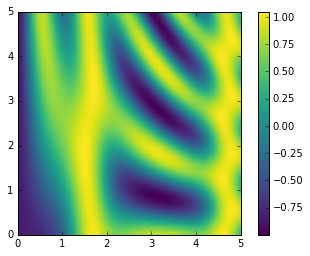

In [ ]:
plt.imshow(z, origin='lower', extent=[0, 5, 0, 5],
           cmap='viridis')
plt.colorbar();

The result is a compelling visualization of the two-dimensional function.